<a href="https://colab.research.google.com/github/LAKSHANA0222/Dimensional-segmentation/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages (only needed once)
!pip install numpy matplotlib scikit-image

# Optional: for working with medical images in DICOM/NIfTI format
# Uncomment if you plan to extend the script later
# !pip install pydicom nibabel

# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure, morphology


Segmenting 2D image...


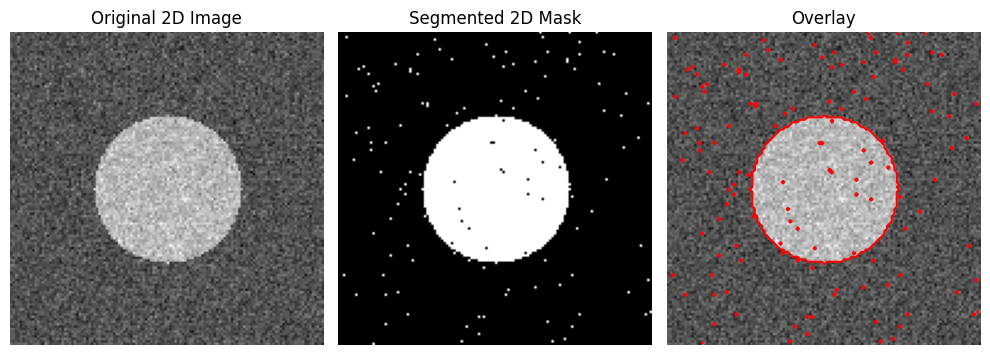

Segmenting 3D volume...


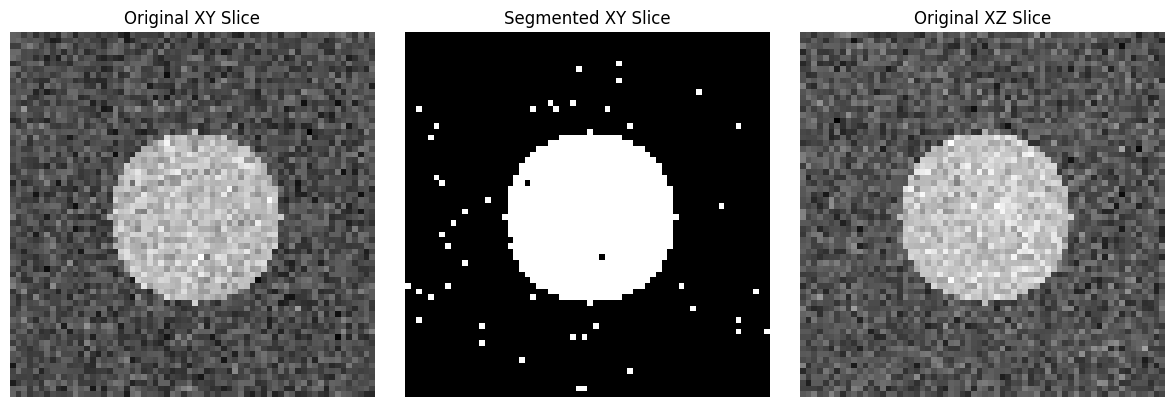

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure, morphology

# ---- Simulate 2D Medical Image and Segment ----
def segment_2d_image():
    print("Segmenting 2D image...")
    # Simulate a 2D grayscale medical image
    image_2d = np.zeros((128, 128), dtype=np.float32)
    rr, cc = np.ogrid[:128, :128]
    mask = (rr - 64)**2 + (cc - 64)**2 <= 30**2
    image_2d[mask] = 1.0  # Circular region (simulated tumor)

    # Add Gaussian noise
    noisy_2d = image_2d + 0.2 * np.random.randn(*image_2d.shape)

    # Threshold segmentation
    threshold = filters.threshold_otsu(noisy_2d)
    segmented_2d = noisy_2d > threshold

    # Show results
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.title("Original 2D Image")
    plt.imshow(noisy_2d, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Segmented 2D Mask")
    plt.imshow(segmented_2d, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Overlay")
    plt.imshow(noisy_2d, cmap='gray')
    plt.contour(segmented_2d, colors='r')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ---- Simulate 3D Medical Volume and Segment ----
def segment_3d_image():
    print("Segmenting 3D volume...")
    # Simulate a 3D volume (e.g. CT or MRI scan)
    volume_3d = np.zeros((64, 64, 64), dtype=np.float32)
    zz, yy, xx = np.ogrid[:64, :64, :64]
    mask_3d = (zz - 32)**2 + (yy - 32)**2 + (xx - 32)**2 <= 15**2
    volume_3d[mask_3d] = 1.0  # Spherical structure

    # Add noise
    noisy_3d = volume_3d + 0.2 * np.random.randn(*volume_3d.shape)

    # Threshold segmentation
    threshold = filters.threshold_otsu(noisy_3d)
    segmented_3d = noisy_3d > threshold

    # Show middle slices
    mid = 32
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(noisy_3d[mid], cmap='gray')
    axes[0].set_title('Original XY Slice')
    axes[1].imshow(segmented_3d[mid], cmap='gray')
    axes[1].set_title('Segmented XY Slice')
    axes[2].imshow(noisy_3d[:, mid, :], cmap='gray')
    axes[2].set_title('Original XZ Slice')
    for ax in axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    segment_2d_image()
    segment_3d_image()
